In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from settings import INPUTS_PATHs, DATA_UTILS_PATH

plt.style.use("bmh")

In [4]:
df = pd.read_csv(os.path.join(INPUTS_PATH,  "fredmd_raw_df.csv"))
df.set_index("date", inplace=True)

des = pd.read_csv(os.path.join(DATA_UTILS_PATH,  "fredmd_description.csv"), sep=";")

In [5]:
df

,Unnamed: 0,UEMP27OV,SRVPRD,TB6SMFFM,DMANEMP,T1YFFM,UEMPMEAN,DDURRG3M086SBEA,CES0600000008,TB6MS,...,PERMITMW,EXCAUSx,GS10,HOUSTNE,M2SL,CPITRNSL,CUMFNS,BAAFFM,GS1,TB3MS
0,1960-01-01,465,34783,0.75,9289,1.04,13.5,57.056,2.22,4.74,...,253.0,0.9532,4.72,274,298.2,30.000,85.5616,1.35,5.03,4.35
1,1960-02-01,429,34908,0.33,9358,0.69,13.1,57.149,2.23,4.30,...,256.0,0.9517,4.49,269,298.4,30.000,84.6108,1.37,4.66,3.96
2,1960-03-01,440,35081,-0.23,9301,0.18,13.0,56.982,2.24,3.61,...,189.0,0.9510,4.25,146,299.3,29.900,83.2421,1.41,4.02,3.31
3,1960-04-01,431,35367,-0.37,9242,0.12,12.6,57.050,2.23,3.55,...,244.0,0.9630,4.28,218,300.1,29.900,82.2593,1.28,4.04,3.23
4,1960-05-01,389,35101,-0.27,9169,0.36,11.9,57.044,2.24,3.58,...,240.0,0.9781,4.35,215,300.9,29.800,81.4711,1.43,4.21,3.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,2022-09-01,1089,132355,1.05,8032,1.31,20.3,97.782,28.27,3.63,...,209.0,1.3339,3.52,148,21516.7,266.678,79.0166,3.11,3.89,3.13
753,2022-10-01,1169,132622,1.10,8059,1.35,20.8,97.400,28.41,4.18,...,210.0,1.3689,3.98,94,21432.3,268.548,79.2371,3.18,4.43,3.72
754,2022-11-01,1215,132871,0.73,8073,0.98,21.4,96.850,28.58,4.48,...,199.0,1.3457,3.89,87,21400.6,266.672,78.5338,2.32,4.73,4.15
755,2022-12-01,1069,133088,0.46,8098,0.59,19.5,96.635,28.70,4.55,...,175.0,1.3585,3.62,206,21236.2,262.384,77.0759,1.50,4.68,4.25


## 1) Transformed dataset

In [20]:
print(df.shape)
df.head()

(757, 123)


,NDMANEMP,IPFPNSS,INVEST,PERMITMW,HOUSTNE,W875RX1,CP3Mx,NONREVSL,EXUSUKx,CONSPI,...,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,6398.0,25.3219,75.4515,253.0,274.0,2398.7,4.91,56.01558,2.7998,0.134750,...,0.000000,0.000000,0.000000,0.003384,0.00000,-0.003339,-0.000552,-0.002136,-0.001619,0.000857
1960-02-01,6407.0,25.1784,73.3363,256.0,269.0,2400.9,4.66,56.36463,2.8033,0.135297,...,-0.002990,0.000000,0.004211,0.000000,0.00000,0.003339,0.001042,0.001629,0.000056,0.001711
1960-03-01,6406.0,25.0922,71.5296,189.0,146.0,2403.1,4.49,56.86288,2.8059,0.136166,...,0.002990,-0.002601,0.004193,0.000000,0.00000,0.000000,0.000551,-0.002926,0.001841,0.000598
1960-04-01,6412.0,25.1497,71.4718,244.0,218.0,2411.8,4.16,57.71140,2.8095,0.137212,...,0.002981,-0.002608,0.000000,0.000000,0.00321,0.003328,0.003665,0.001193,0.006280,0.002049
1960-05-01,6406.0,25.2932,71.6858,240.0,215.0,2417.7,4.25,57.95103,2.8060,0.137292,...,0.000000,-0.002614,0.004175,0.000000,0.00320,0.000000,0.001036,-0.000105,-0.000443,0.002640


## 2) FRED MD data description

In [21]:
des.head()

,id,tcode,ttype,fred,description,gsi,gsi:description,group,edited
0,1,5,First difference of natural log: ln(x)-ln(x-1),RPI,Real Personal Income,M_14386177,PI,Output and Income,False
1,2,5,First difference of natural log: ln(x)-ln(x-1),W875RX1,Real personal income ex transfer receipts,M_145256755,PI less transfers,Output and Income,False
2,3,5,First difference of natural log: ln(x)-ln(x-1),DPCERA3M086SBEA,Real personal consumption expenditures,M_123008274,Real Consumption,"Consumption, Orders, and Inventories",False
3,4,5,First difference of natural log: ln(x)-ln(x-1),CMRMTSPLx,Real Manu. and Trade Industries Sales,M_110156998,M&T sales,"Consumption, Orders, and Inventories",True
4,5,5,First difference of natural log: ln(x)-ln(x-1),RETAILx,Retail and Food Services Sales,M_130439509,Retail sales,"Consumption, Orders, and Inventories",True


### Groups

In [34]:
des["group"].unique()

array(['Output and Income', 'Consumption, Orders, and Inventories',
       'Labor Market', 'Housing', 'Money and Credit', 'Stock Market',
       'Interest and Exchange Rates', 'Prices'], dtype=object)

### Transformations

In [41]:
des["ttype"].unique()

array(['First difference of natural log: ln(x)-ln(x-1)',
       'Level (i.e. no transformation): x(t)',
       'First difference: x(t)-x(t-1)', 'Natural log: ln(x)',
       'Second difference of natural log: (ln(x)-ln(x-1))-(ln(x-1)-ln(x-2))',
       'First difference of percent change: (x(t)/x(t-1)-1)-(x(t-1)/x(t-2)-1)'],
      dtype=object)

## 3) Prices

In [22]:
des.loc[des["group"] == "Prices"]

,id,tcode,ttype,fred,description,gsi,gsi:description,group,edited
105,106,6,Second difference of natural log: (ln(x)-ln(x-...,WPSFD49207,PPI: Finished Goods,M110157517,PPI: n gds,Prices,False
106,107,6,Second difference of natural log: (ln(x)-ln(x-...,WPSFD49502,PPI: Finished Consumer Goods,M110157508,PPI: cons gds,Prices,False
107,108,6,Second difference of natural log: (ln(x)-ln(x-...,WPSID61,PPI: Intermediate Materials,M_110157527,PPI: int matls,Prices,False
108,109,6,Second difference of natural log: (ln(x)-ln(x-...,WPSID62,PPI: Crude Materials,M_110157500,PPI: crude matls,Prices,False
109,110,6,Second difference of natural log: (ln(x)-ln(x-...,OILPRICEx,"Crude Oil, spliced WTI and Cushing",M_110157273,Spot market price,Prices,True
110,111,6,Second difference of natural log: (ln(x)-ln(x-...,PPICMM,PPI: Metals and metal products:,M_110157335,PPI: nonferrous,Prices,False
111,112,1,Level (i.e. no transformation): x(t),NAPMPRI,ISM Manufacturing: Prices Index,M_110157204,NAPM com price,Prices,False
112,113,6,Second difference of natural log: (ln(x)-ln(x-...,CPIAUCSL,CPI : All Items,M_110157323,CPI-U: all,Prices,False
113,114,6,Second difference of natural log: (ln(x)-ln(x-...,CPIAPPSL,CPI : Apparel,M_110157299,CPI-U: apparel,Prices,False
114,115,6,Second difference of natural log: (ln(x)-ln(x-...,CPITRNSL,CPI : Transportation,M_110157302,CPI-U: transp,Prices,False


### CPI categories

<Axes: xlabel='date'>

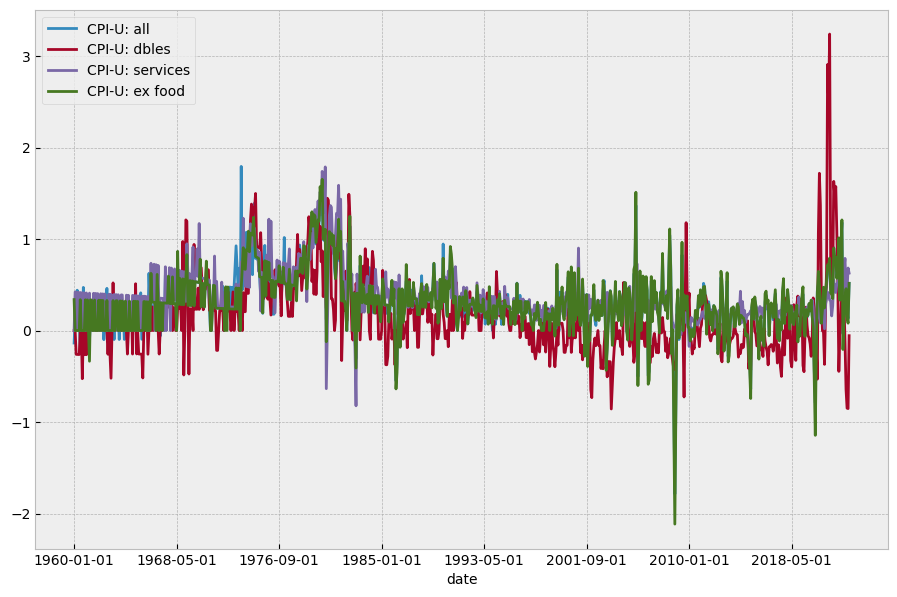

In [31]:
selected_vars = ["CPIAUCSL", "CUSR0000SAD", "CUSR0000SAS", "CPIULFSL"]

selected_df = df[selected_vars]
selected_df.columns = [des.loc[des["fred"] == var]["gsi:description"].iloc[0] for var in selected_vars]

(selected_df * 100).plot(figsize=(11, 7))

<Axes: xlabel='date'>

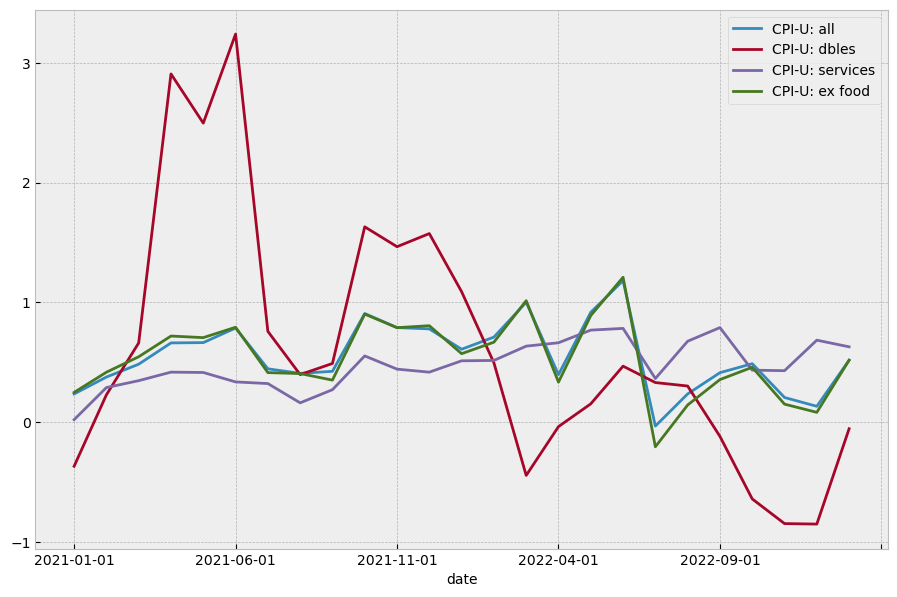

In [32]:
(selected_df * 100).loc["2021-01-01":].plot(figsize=(11, 7))

## 4) Interest and exchange rates

In [35]:
des.loc[des["group"] == "Interest and Exchange Rates"]

,id,tcode,ttype,fred,description,gsi,gsi:description,group,edited
83,84,2,First difference: x(t)-x(t-1),FEDFUNDS,E?ective Federal Funds Rate,M_110155157,Fed Funds,Interest and Exchange Rates,False
84,85,2,First difference: x(t)-x(t-1),CP3Mx,3-Month AA Financial Commercial Paper Rate,CPF3M,Comm paper,Interest and Exchange Rates,True
85,86,2,First difference: x(t)-x(t-1),TB3MS,3-Month Treasury Bill:,M_110155165,3 mo T-bill,Interest and Exchange Rates,False
86,87,2,First difference: x(t)-x(t-1),TB6MS,6-Month Treasury Bill:,M_110155166,6 mo T-bill,Interest and Exchange Rates,False
87,88,2,First difference: x(t)-x(t-1),GS1,1-Year Treasury Rate,M_110155168,1 yr T-bond,Interest and Exchange Rates,False
88,89,2,First difference: x(t)-x(t-1),GS5,5-Year Treasury Rate,M_110155174,5 yr T-bond,Interest and Exchange Rates,False
89,90,2,First difference: x(t)-x(t-1),GS10,10-Year Treasury Rate,M_110155169,10 yr T-bond,Interest and Exchange Rates,False
90,91,2,First difference: x(t)-x(t-1),AAA,Moody s Seasoned Aaa Corporate Bond Yield,NaN,Aaa bond,Interest and Exchange Rates,False
91,92,2,First difference: x(t)-x(t-1),BAA,Moody s Seasoned Baa Corporate Bond Yield,NaN,Baa bond,Interest and Exchange Rates,False
92,93,1,Level (i.e. no transformation): x(t),COMPAPFFx,3-Month Commercial Paper Minus FEDFUNDS,NaN,CP-FF spread,Interest and Exchange Rates,True


<Axes: xlabel='date'>

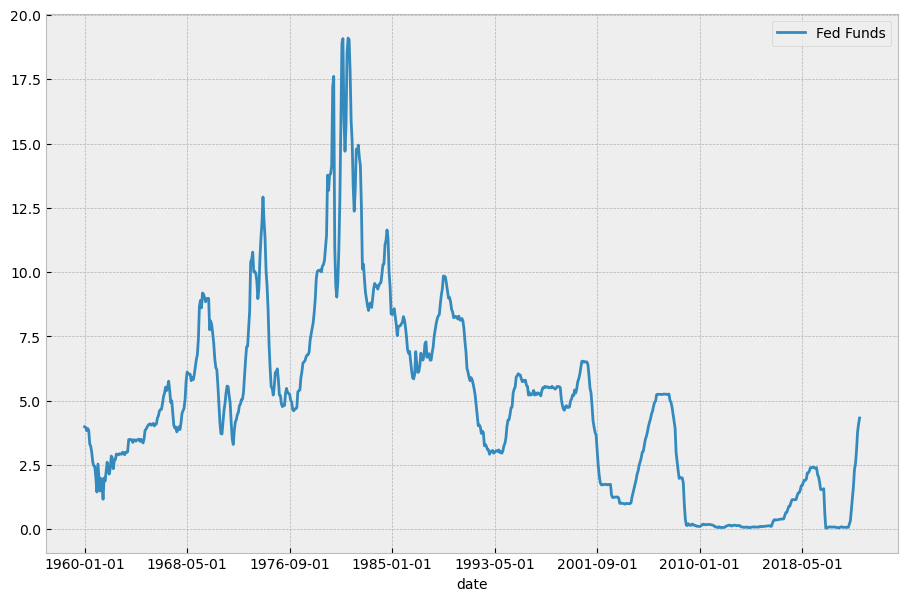

In [39]:
selected_vars = ["FEDFUNDS"]

selected_df = df[selected_vars]
selected_df.columns = [des.loc[des["fred"] == var]["gsi:description"].iloc[0] for var in selected_vars]

selected_df.plot(figsize=(11, 7))

In [49]:
from FredMD import FredMD

fmd = FredMD(Nfactor=None, vintage=None, maxfactor=8, standard_method=2, ic_method=2)


https://files.stlouisfed.org/files/htdocs/fred-md/monthly/current.csv


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
1959-01-01,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0151,23.3984,22.2848,31.5847,18.6861,...,17.791,11.326,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2451.778,2301.5,17.452,294424.7425,18369.56308,22.4463,23.7142,22.4778,31.8164,18.7842,...,17.798,11.343,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2467.594,2318.5,17.617,293418.6704,18523.05762,22.7696,23.8577,22.5882,31.8164,19.1520,...,17.785,11.363,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2483.671,2334.9,17.553,299322.8039,18534.46600,23.2547,24.2022,22.9191,32.3184,19.2746,...,17.796,11.403,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2498.026,2350.4,17.765,301364.3249,18679.66354,23.6050,24.4032,23.1398,32.4728,19.6670,...,17.777,11.421,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [52]:
fmd.apply_transforms()

In [56]:
fmd.series

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
1959-03-01,0.006430,0.007359,0.009410,-0.003423,0.008321,0.014301,0.006033,0.004899,0.000000,0.019391,...,-0.001124,0.000262,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1959-04-01,0.006494,0.007049,-0.003639,0.019922,0.000616,0.021081,0.014337,0.014543,0.015655,0.006381,...,0.001349,0.001752,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
1959-05-01,0.005763,0.006616,0.012005,0.006797,0.007803,0.014951,0.008271,0.009583,0.004766,0.020154,...,-0.001687,-0.001937,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN
1959-06-01,0.003102,0.002974,0.003708,-0.000052,0.009064,0.001139,0.007036,0.007122,-0.004766,0.007452,...,0.003316,0.002093,-0.004619,0.003992,0.004796,NaN,0.009726,0.009007,-0.012252,NaN
1959-07-01,-0.000589,-0.000764,-0.003427,0.012110,-0.000330,-0.024238,0.001167,0.008252,0.013056,0.019606,...,-0.001238,-0.000100,0.000000,-0.004040,-0.004796,NaN,-0.004631,-0.001000,0.029341,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,0.001310,0.002391,0.002582,0.000578,-0.001674,0.001956,-0.001360,-0.002311,-0.005121,-0.005275,...,0.003919,-0.000110,0.001406,-0.000034,0.003171,0.4,0.005693,0.000717,-0.007420,27.0915
2022-10-01,0.004929,0.001923,0.003318,-0.001031,0.010616,0.000179,0.004620,0.007262,0.007908,0.018595,...,0.012495,-0.001477,0.000331,-0.001553,0.000375,1.3,-0.000678,0.003626,-0.005197,29.9215
2022-11-01,0.001898,0.001797,-0.003194,-0.009608,-0.010802,-0.005831,-0.005445,-0.006610,-0.005735,-0.028380,...,-0.008829,-0.000520,0.001026,-0.000624,0.003892,-3.1,0.002135,0.000955,0.009257,23.0367
2022-12-01,0.001156,0.001590,-0.003321,0.015158,-0.010998,-0.010236,-0.008693,-0.006204,-0.001970,-0.017382,...,-0.006173,0.001815,-0.001776,0.002399,-0.007070,2.9,-0.002817,-0.001225,0.007180,21.7702
